 <img src="https://eant.tech/imagenes/logo.png" width=25% height=80%  >

## <img src="http://icons.iconarchive.com/icons/cornmanthe3rd/plex/256/Other-python-icon.png" width="40"> Ejercicio Terremotos 🌍🌊🌐🏔️

<center>
<img src="https://i.ibb.co/Z8DYxPV/ciudad-destruida-zona-guerra-107791-3703.jpg" alt="ciudad-destruida-zona-guerra-107791-3703" border="0">

> source image: [link](https://www.freepik.es/vector-gratis/ciudad-destruida-zona-guerra_10385769.htm#page=1&query=Terremoto&position=2)

🏷️ Importar las siguientes librerías de python

* pandas [`pd`]
* folium
* numpy [`np`]
* matplotlib.pyplot [`plt`]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

🏷️ Importar el dataframe denominado `terremotos` que se encuentra en la siguiente url


In [2]:
url="https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-05-29/terremotos.csv"

In [3]:
terremotos = pd.read_csv(url)

🏷️ Imprimir las primeras 5 observaciones

In [4]:
terremotos.head()

,fecha,hora,latitud,longitud,tipo,profundidad,magnitud
0,1965-01-02,13:44:18,19.246,145.616,terremoto,131.6,6.0
1,1965-01-04,11:29:49,1.863,127.352,terremoto,80.0,5.8
2,1965-01-05,18:05:58,-20.579,-173.972,terremoto,20.0,6.2
3,1965-01-08,18:49:43,-59.076,-23.557,terremoto,15.0,5.8
4,1965-01-09,13:32:50,11.938,126.427,terremoto,15.0,5.8


🏷️ Imprimir la cantidad de filas y columnas que posee el dataframe

In [5]:
terremotos.shape

(23412, 7)

🏷️ Calcular la media, cuartiles, máximo, mínimo y desviación de las columnas profundidad y magnitud.

In [6]:
terremotos[["magnitud", "profundidad"]].describe()

,magnitud,profundidad
count,23412.000000,23412.000000
mean,5.882531,70.767911
std,0.423066,122.651898
min,5.500000,-1.100000
25%,5.600000,14.522500
50%,5.700000,33.000000
75%,6.000000,54.000000
max,9.100000,700.000000


🏷️ Valide si el dataframe posee columnas con valores nulos

In [7]:
terremotos.isna().sum()

fecha          0
hora           0
latitud        0
longitud       0
tipo           0
profundidad    0
magnitud       0
dtype: int64

🏷️ Realizar una nueva variable denominada `hora_` que tenga el mismo valor que la variable `hora` en formato numérico

In [8]:
terremotos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        23412 non-null  object 
 1   hora         23412 non-null  object 
 2   latitud      23412 non-null  float64
 3   longitud     23412 non-null  float64
 4   tipo         23412 non-null  object 
 5   profundidad  23412 non-null  float64
 6   magnitud     23412 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.3+ MB


In [9]:
terremotos["hora_"] = [ int(i[:2])  for i in terremotos.hora  ]

ValueError: ignored

In [10]:
terremotos["hora_"] = [ i[:2]  for i in terremotos.hora  ]

In [11]:
terremotos.hora_.unique()

array(['13', '11', '18', '23', '10', '20', '00', '09', '05', '15', '03',
       '06', '07', '08', '12', '14', '19', '22', '01', '04', '16', '02',
       '17', '21', 'NA'], dtype=object)

In [12]:
terremotos.loc[terremotos.hora == "NA:NA:NANA", :]

,fecha,hora,latitud,longitud,tipo,profundidad,magnitud,hora_
3378,1975-02-23,NA:NA:NANA,8.017,124.075,terremoto,623.0,5.6,NA
7512,1985-04-28,NA:NA:NANA,-32.998,-71.766,terremoto,33.0,5.6,NA
20650,2011-03-13,NA:NA:NANA,36.344,142.344,terremoto,10.1,5.8,NA


In [17]:
terremotos = terremotos.loc[terremotos.hora_ != "NA", :]

In [18]:
terremotos["hora_"] = terremotos["hora_"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
terremotos.info()

🏷️ ¿Cuáles son las horas que más terremotos se producen?

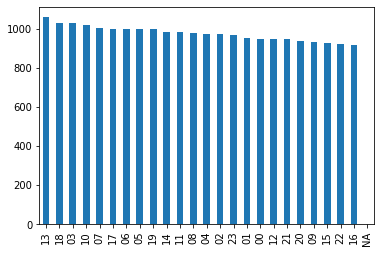

In [13]:
terremotos.hora_.value_counts().plot(kind ="bar")

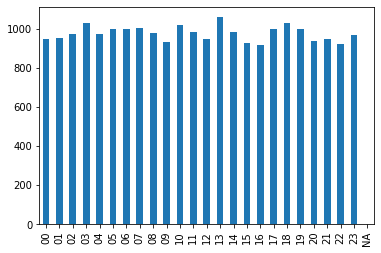

In [14]:
terremotos.hora_.value_counts().sort_index().plot(kind ="bar")

🏷️ Agregar una columna teniendo en cuenta los momentos del día

Momento | Intervalo
----|----
 'Madrugada'| de las   00 a las 06
 'Mañana'   | de las   07 a las 12
 'Tarde'    | de las 13  a las 19
 'Noche'    | de las 20  a las 23

In [19]:
terremotos["momento"] = pd.cut(terremotos["hora_"],
                               bins = [-1, 6, 12, 19, 23],
                               labels = ["Madrugada", "Mañana", "Tarde", "Noche"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


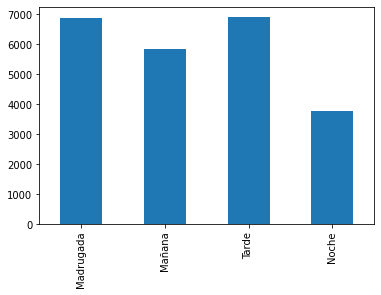

In [20]:
terremotos.momento.value_counts().sort_index().plot(kind= "bar")

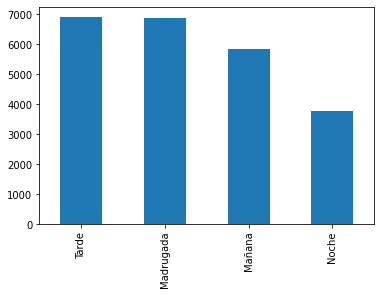

In [21]:
terremotos.momento.value_counts().plot(kind= "bar")

🏷️ Ahora volver a calcular cual es el momento del día con más terremotos.

In [ ]:
terremotos.momento.value_counts().sort_values(ascending = False)

🏷️ Agregar una variable que muestre las categorías de los terremotos, para lo cual tome como base la descripción que aparece a continuación

> Para mas info: https://es.wikipedia.org/wiki/Escala_sismol%C3%B3gica_de_Richter


Magnitud |	Descripción	| Efectos de un sismo	| Frecuencia de ocurrencia
---|---|---|---|
Menos de 2,0 	|Micro	| Los microsismos no son perceptibles.|	Alrededor de 8000 por día
2,0-2,9 |	Menor	 |Generalmente no son perceptibles.	|Alrededor de 1000 por día
3,0-3,9 | Menor |	Perceptibles a menudo, pero rara vez provocan daños. |	49 000 por año.
4,0-4,9	 | Ligero	| Movimiento de objetos en las habitaciones que genera ruido. <br> Sismo significativo pero con daño poco probable.	| 6200 por año.
5,0-5,9	| Moderado	| Puede causar daños mayores en edificaciones débiles o mal construidas. <br> En edificaciones bien diseñadas los daños son leves.	| 800 por año.
6,0-6,9	| 	Fuerte 	| 	Pueden llegar a destruir áreas pobladas, en hasta unos 160 kilómetros a la redonda.	| 	120 por año.
7,0-7,9	| 	Mayor		| Puede causar serios daños en extensas zonas.		| 18 por año.
8,0-8,9		| Épico o Cataclismo	| 	Puede causar graves daños en zonas de varios cientos de kilómetros.		| 1-3 por año.
9,0-9,9	| Épico o Cataclismo	| 	Devastadores en zonas de varios miles de kilómetros.	| 1-2 en 20 años.
10,0+		| Legendario o apocalíptico		| Nunca registrado. | Nunca ha sucedido un sismo de esta magnitud.



In [22]:
terremotos["Descripcion"] = pd.cut(terremotos["magnitud"],
                                   bins = [0, 2, 3.99, 4.99, 5.99, 6.99, 7.99,  9.99, 10],
                                   labels = ["Micro", "Menor", "Ligero", "Moderado", "Fuerte", "Mayor", "Epico", "Legendario"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
terremotos.Descripcion.value_counts()

Moderado      16055
Fuerte         6616
Mayor           698
Epico            40
Legendario        0
Ligero            0
Menor             0
Micro             0
Name: Descripcion, dtype: int64

🏷️ ¿Cuántos terremotos en base a las categorías ocurrieron?

In [24]:
terremotos.Descripcion.value_counts()

Moderado      16055
Fuerte         6616
Mayor           698
Epico            40
Legendario        0
Ligero            0
Menor             0
Micro             0
Name: Descripcion, dtype: int64

🏷️ Imprimir las observaciones que contienen en categoría la descripción "Sin condiciones posibles"

🏷️ Cómo podemos corregir los que se asignaron como **`Sin condiciones posibles`**?

🏷️ Generar una base con los terremotos tiene valores magnitudes mayores a 6 a partir del 2016 en adelante

In [25]:
terremotos["fecha"] = pd.to_datetime(terremotos["fecha"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
terremotos_fuertes = terremotos.loc[(terremotos.magnitud >   6) & (terremotos.fecha >= "2016-01-01"),:    ]

🏷️ ¿Cuántas filas y columnas posee el nuevo dataframe?

In [27]:
terremotos_fuertes.shape

(116, 10)

9. Mapas

<center>
<img src="https://i.ibb.co/2Kh4z1y/Maps-banner.jpg" alt="Maps-banner" border="0">

> source image: [link](https://www.kawarthalakes.ca/en/things-to-do/maps.aspx)

🏷️ Generar un mapa que tenga como valor inicial las coordenadas del obelisco de Buenos Aires, las cuales son:
* Longitud= -58.38162
* Latitud= -34.60376

In [28]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10 )
m

🏷️ Modificar el mapa para visualizarlo con las siguientes opciones: "OpenStreetMap" y "CartoDB Dark_Matter"

In [29]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10, tiles = "CartoDB Dark_Matter" )
m

🏷️  Permitir que las siguientes opciones 
* **Tiles**
  - "OpenStreetMap"
  - "Stamen Terrain" 
  - "Stamen Toner"
  - "Stamen Watercolor"
  - "CartoDB Dark_Matter"


In [30]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10)
folium.TileLayer(tiles = "OpenStreetMap").add_to(m)
folium.TileLayer(tiles = "Stamen Terrain").add_to(m)
folium.TileLayer(tiles = "Stamen Toner").add_to(m)
folium.TileLayer(tiles = "Stamen Watercolor").add_to(m)
folium.TileLayer(tiles = "CartoDB Dark_Matter").add_to(m)
folium.LayerControl().add_to(m)

m

🏷️  Ubicar al obelisco de buenos aires en el mapa (lat=40.758896,long=-73.985130)

In [ ]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10)
folium.TileLayer(tiles = "OpenStreetMap").add_to(m)
folium.TileLayer(tiles = "Stamen Terrain").add_to(m)
folium.TileLayer(tiles = "Stamen Toner").add_to(m)
folium.TileLayer(tiles = "Stamen Watercolor").add_to(m)
folium.TileLayer(tiles = "CartoDB Dark_Matter").add_to(m)
folium.LayerControl().add_to(m)
folium.Marker(location=[Latitud, Longitud]).add_to(m)

m

🏷️  Agregar un popup al mapa con la denominación del lugar 

In [31]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10)
folium.TileLayer(tiles = "OpenStreetMap").add_to(m)
folium.TileLayer(tiles = "Stamen Terrain").add_to(m)
folium.TileLayer(tiles = "Stamen Toner").add_to(m)
folium.TileLayer(tiles = "Stamen Watercolor").add_to(m)
folium.TileLayer(tiles = "CartoDB Dark_Matter").add_to(m)
folium.LayerControl().add_to(m)
folium.Marker(location=[Latitud, Longitud], popup= "Obelisco").add_to(m)

m

🏷️  Agregar un circulo en la adyacencia, el cual tenga:
* radio: 50
* fill: True
* fill_color: blue

In [32]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10)
folium.TileLayer(tiles = "OpenStreetMap").add_to(m)
folium.TileLayer(tiles = "Stamen Terrain").add_to(m)
folium.TileLayer(tiles = "Stamen Toner").add_to(m)
folium.TileLayer(tiles = "Stamen Watercolor").add_to(m)
folium.TileLayer(tiles = "CartoDB Dark_Matter").add_to(m)
folium.LayerControl().add_to(m)
folium.Marker(location=[Latitud, Longitud], popup= "Obelisco").add_to(m)
folium.CircleMarker(location= [Latitud, Longitud], radius = 50, fill = True, fill_color = "blue").add_to(m)

m

🏷️  Generar un objeto `minimap`

In [33]:
from folium.plugins import MiniMap

In [34]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10)
folium.TileLayer(tiles = "OpenStreetMap").add_to(m)
folium.TileLayer(tiles = "Stamen Terrain").add_to(m)
folium.TileLayer(tiles = "Stamen Toner").add_to(m)
folium.TileLayer(tiles = "Stamen Watercolor").add_to(m)
folium.TileLayer(tiles = "CartoDB Dark_Matter").add_to(m)
folium.LayerControl().add_to(m)
folium.Marker(location=[Latitud, Longitud], popup= "Obelisco").add_to(m)
folium.CircleMarker(location= [Latitud, Longitud], radius = 50 , fill = True, fill_color = "blue").add_to(m)


minimapa = MiniMap()
m.add_child(minimapa)

m

🏷️  Permitir que el minimap se pueda minimizar

In [ ]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10)
folium.TileLayer(tiles = "OpenStreetMap").add_to(m)
folium.TileLayer(tiles = "Stamen Terrain").add_to(m)
folium.TileLayer(tiles = "Stamen Toner").add_to(m)
folium.TileLayer(tiles = "Stamen Watercolor").add_to(m)
folium.TileLayer(tiles = "CartoDB Dark_Matter").add_to(m)
folium.LayerControl().add_to(m)
folium.Marker(location=[Latitud, Longitud], popup= "Obelisco").add_to(m)
folium.CircleMarker(location= [Latitud, Longitud], radius = 50 , fill = True, fill_color = "blue").add_to(m)


minimapa = MiniMap(toggle_display= True)
m.add_child(minimapa)

m

🏷️  Cambiar el tipo de mosaico del minimap, el mismo debe ser 'Stamen Terrain'

In [ ]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10)
folium.TileLayer(tiles = "OpenStreetMap").add_to(m)
folium.TileLayer(tiles = "Stamen Terrain").add_to(m)
folium.TileLayer(tiles = "Stamen Toner").add_to(m)
folium.TileLayer(tiles = "Stamen Watercolor").add_to(m)
folium.TileLayer(tiles = "CartoDB Dark_Matter").add_to(m)
folium.LayerControl().add_to(m)
folium.Marker(location=[Latitud, Longitud], popup= "Obelisco").add_to(m)
folium.CircleMarker(location= [Latitud, Longitud], radius = 50 , fill = True, fill_color = "blue").add_to(m)


minimapa = MiniMap(toggle_display= True, tile_layer= 'Stamen Terrain' )
m.add_child(minimapa)

m

🏷️  Cambiar la posición del minimap

In [ ]:
Longitud = -58.38162
Latitud =  -34.60376


m = folium.Map(location = [Latitud, Longitud], zoom_start = 10)
folium.TileLayer(tiles = "OpenStreetMap").add_to(m)
folium.TileLayer(tiles = "Stamen Terrain").add_to(m)
folium.TileLayer(tiles = "Stamen Toner").add_to(m)
folium.TileLayer(tiles = "Stamen Watercolor").add_to(m)
folium.TileLayer(tiles = "CartoDB Dark_Matter").add_to(m)
folium.LayerControl().add_to(m)
folium.Marker(location=[Latitud, Longitud], popup= "Obelisco").add_to(m)
folium.CircleMarker(location= [Latitud, Longitud], radius = 50 , fill = True, fill_color = "blue").add_to(m)


minimapa = MiniMap(toggle_display= True, tile_layer= 'Stamen Terrain', position="topright" )
m.add_child(minimapa)

m

### Mapas de terremotos 🌍🌊🌐🏔️

🏷️  Para generar los marcadores donde se generaron los incidentes es necesario utilizar un ciclo `for` por lo cual debemos asegurar que no existan índices duplicados

In [ ]:
terremotos_fuertes = terremotos_fuertes.reset_index(drop = True)

In [ ]:
terremotos_fuertes

🏷️  Generar los marcadores para cada observación y agregarlos al mapa.
Iniciar vista inicial del mapa en:
* latitud:0
* longitud:0
* zoom: 4

In [ ]:
terremotos_fuertes.shape[0]

In [ ]:
Latitud = 0
Longitud = 0

m = folium.Map(location= [Latitud, Longitud], zoom_start= 4)


for i in range(0,terremotos_fuertes.shape[0]):
  lat_ = terremotos_fuertes.loc[i, "latitud"]
  lon_ = terremotos_fuertes.loc[i, "longitud"]
  folium.Marker(location=[lat_, lon_]).add_to(m)

m

🏷️  Generar un círculo para cada observación, y debe tener las siguientes características:
* color: `rojo`
* radio: debe ser igual al valor que tiene la variable magnitud.
* fill: true
* color: blue

In [ ]:
terremotos_fuertes.head()

In [ ]:
Latitud = 0
Longitud = 0

m = folium.Map(location= [Latitud, Longitud], zoom_start= 4)


for i in range(0,terremotos_fuertes.shape[0]):
  lat_ = terremotos_fuertes.loc[i, "latitud"]
  lon_ = terremotos_fuertes.loc[i, "longitud"]
  mag_ = terremotos_fuertes.loc[i, "magnitud"]
  folium.Marker(location=[lat_, lon_]).add_to(m)
  folium.CircleMarker(location = [lat_, lon_], radius= mag_, fill = True, fill_color = "red").add_to(m)
m

🏷️  Incrementar el radio multiplicando el valor de la variable magnitud por 5

In [ ]:
Latitud = 0
Longitud = 0

m = folium.Map(location= [Latitud, Longitud], zoom_start= 4)


for i in range(0,terremotos_fuertes.shape[0]):
  lat_ = terremotos_fuertes.loc[i, "latitud"]
  lon_ = terremotos_fuertes.loc[i, "longitud"]
  mag_ = terremotos_fuertes.loc[i, "magnitud"]
  folium.Marker(location=[lat_, lon_]).add_to(m)
  folium.CircleMarker(location = [lat_, lon_], radius= mag_ * 5, fill = True, fill_color = "red").add_to(m)
m

🏷️  Vamos agregar un popup que tenga la profundidad del terremoto


In [ ]:
Latitud = 0
Longitud = 0

m = folium.Map(location= [Latitud, Longitud], zoom_start= 4)


for i in range(0,terremotos_fuertes.shape[0]):
  lat_ = terremotos_fuertes.loc[i, "latitud"]
  lon_ = terremotos_fuertes.loc[i, "longitud"]
  mag_ = terremotos_fuertes.loc[i, "magnitud"]
  prof_ = str(terremotos_fuertes.loc[i, "profundidad"])
  folium.Marker(location=[lat_, lon_], popup = prof_).add_to(m)
  folium.CircleMarker(location = [lat_, lon_], radius= mag_ * 5, fill = True, fill_color = "red").add_to(m)
m

🏷️  Modificar el popup para que tenga la profundidad del terremoto y la magnitud

In [ ]:
Latitud = 0
Longitud = 0

m = folium.Map(location= [Latitud, Longitud], zoom_start= 4)


for i in range(0,terremotos_fuertes.shape[0]):
  lat_ = terremotos_fuertes.loc[i, "latitud"]
  lon_ = terremotos_fuertes.loc[i, "longitud"]
  mag_ = terremotos_fuertes.loc[i, "magnitud"]
  prof_ = str(terremotos_fuertes.loc[i, "profundidad"])
  pop = "magnitud:" + str(mag_) + ", profundidad:" + prof_
  folium.Marker(location=[lat_, lon_], popup = pop).add_to(m)
  folium.CircleMarker(location = [lat_, lon_], radius= mag_ * 5, fill = True, fill_color = "red").add_to(m)


m

🏷️  Modificar el icono de cada marker por `tag`, los mismos pueden ser seleccionado en:

> https://getbootstrap.com/docs/3.3/components/

In [ ]:
Latitud = 0
Longitud = 0

m = folium.Map(location= [Latitud, Longitud], zoom_start= 4)


for i in range(0,terremotos_fuertes.shape[0]):
  lat_ = terremotos_fuertes.loc[i, "latitud"]
  lon_ = terremotos_fuertes.loc[i, "longitud"]
  mag_ = terremotos_fuertes.loc[i, "magnitud"]
  prof_ = str(terremotos_fuertes.loc[i, "profundidad"])
  pop = "magnitud:" + str(mag_) + ", profundidad:" + prof_
  folium.Marker(location=[lat_, lon_], popup = pop, icon= folium.Icon(icon="tag")).add_to(m)
  folium.CircleMarker(location = [lat_, lon_], radius= mag_ * 5, fill = True, fill_color = "red").add_to(m)


m

🏷️  Modifiquemos el icono condicionalmente asignando:
* Fuerte: `tag`, color: `purple`
* Mayor: `cloud`, color: `blue`


In [ ]:
Latitud = 0
Longitud = 0

m = folium.Map(location= [Latitud, Longitud], zoom_start= 4)


for i in range(0,terremotos_fuertes.shape[0]):
  lat_ = terremotos_fuertes.loc[i, "latitud"]
  lon_ = terremotos_fuertes.loc[i, "longitud"]
  mag_ = terremotos_fuertes.loc[i, "magnitud"]
  prof_ = str(terremotos_fuertes.loc[i, "profundidad"])
  pop = "magnitud:" + str(mag_) + ", profundidad:" + prof_
  cat_ = terremotos_fuertes.loc[i, "Descripcion"]

  if cat_ == "Fuerte":
    folium.Marker(location=[lat_, lon_],
                  popup = pop,
                  icon = folium.Icon(color = "purple", icon = "tag")).add_to(m)
  else:
    folium.Marker(location=[lat_, lon_],
                  popup = pop,
                  icon = folium.Icon(color = "blue", icon = "cloud")).add_to(m)
  folium.CircleMarker(location = [lat_, lon_], radius= mag_ * 5, fill = True, fill_color = "red").add_to(m)


m

In [ ]:
terremotos_fuertes.columns

🏷️  Generar cluster en el mapa

In [35]:
from folium.plugins import MarkerCluster

In [ ]:
Latitud = 0
Longitud = 0

m = folium.Map(location= [Latitud, Longitud], zoom_start= 4)
cluster = MarkerCluster().add_to(m)

for i in range(0,terremotos_fuertes.shape[0]):
  lat_ = terremotos_fuertes.loc[i, "latitud"]
  lon_ = terremotos_fuertes.loc[i, "longitud"]
  mag_ = terremotos_fuertes.loc[i, "magnitud"]
  prof_ = str(terremotos_fuertes.loc[i, "profundidad"])
  pop = "magnitud:" + str(mag_) + ", profundidad:" + prof_
  cat_ = terremotos_fuertes.loc[i, "Descripcion"]

  if cat_ == "Fuerte":
    folium.Marker(location=[lat_, lon_],
                  popup = pop,
                  icon = folium.Icon(color = "purple", icon = "tag")).add_to(cluster)
  else:
    folium.Marker(location=[lat_, lon_],
                  popup = pop,
                  icon = folium.Icon(color = "blue", icon = "cloud")).add_to(cluster)
  folium.CircleMarker(location = [lat_, lon_], radius= mag_ * 5, fill = True, fill_color = "red").add_to(cluster)


m

## <img src="http://icons.iconarchive.com/icons/cornmanthe3rd/plex/256/Other-python-icon.png" width="40"> Ejercicio Hospitales y Clínicas 🩺💉🏥


Generar un mapa de la ciudad de Buenos Aires, donde se muestren con diferentes iconos:
* las clínicas privadas `[centros-de-salud-privados.csv]`
* los hospitales `[hospitales.csv]`

El mapa debe tener:
* zoom=10, 
* latitud y longitud que sea el promedio de ambas variables del dataset.
* Generar clusters para la visualización.


In [36]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [37]:
hospitales = pd.read_csv("/content/gdrive/MyDrive/Eant/hospitales_caba.csv")
clinicas = pd.read_csv("/content/gdrive/MyDrive/Eant/centros-de-salud-privados.csv")

In [40]:
hospitales.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'WKT', 'ID', 'NOMBRE', 'NOM_MAP',
       'OBJETO', 'CALLE', 'ALTURA', 'DOM_NORMA', 'DOM_GEO', 'TELEFONO',
       'GUARDIA', 'FAX', 'WEB', 'COD_POSTAL', 'TIPO', 'TIPO_ESPEC', 'MOD_AT_1',
       'MOD_AT_2', 'DEPEND_ADM', 'DIRECTOR', 'point', 'long', 'lat'],
      dtype='object')

In [41]:
clinicas.columns

Index(['long', 'lat', 'nombre', 'calle', 'altura', 'piso', 'telefonos',
       'barrio', 'comuna', 'codigo_postal', 'codigo_postal_argentino'],
      dtype='object')

In [44]:
hospitales = hospitales[["NOMBRE", "long", "lat"]]
hospitales = hospitales.iloc[:,[5,-2,-1]]


In [46]:
clinicas = clinicas[["nombre", "long", "lat"]]

In [48]:
hospitales = hospitales.rename(columns= { "NOMBRE" : "nombre"})

In [49]:
hospitales["Categoria"] = "Publico"
clinicas["Categoria"] = "Privado"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df = pd.concat([clinicas, hospitales], axis = 0)

In [56]:
df = df.reset_index(drop=True)

In [58]:
Latitud = sum(df.lat)/len(df.lat)
Longitud = sum(df["long"])/len(df["long"])

In [62]:
m = folium.Map(location = [Latitud, Longitud], zoom_start= 10, tiles= 'OpenStreetMap')
cluster = MarkerCluster().add_to(m)



for i in range(0, df.shape[0]):
  lat_ = df.loc[i, "lat"]
  lon_ = df.loc[i, "long"]
  nombre = df.loc[i, "nombre"]
  cat_ = df.loc[i, "Categoria"]

  if cat_ == "Publico":
    folium.Marker(location=[lat_, lon_], popup = nombre, icon= folium.Icon(color = "lightblue", icon = "tint")).add_to(cluster)
  else:
    folium.Marker(location=[lat_, lon_], popup = nombre, icon= folium.Icon(color = "red", icon = "heart-empty")).add_to(cluster)
  folium.CircleMarker(location= [lat_, lon_], radius = 10, fill = True, fill_color = "blue"). add_to(cluster)

m